# Münster: Energy and Greenhouse Gas Balance 1990 – 2021


## Introduction:
Münster, the city of science and learning, Westphalian Peace, the capital city of bicycles, and Germany's Climate Protection Capital. Achieving climate neutrality for the city of Münster is a very big challenge and requires a significant intensification and, above all, acceleration of the activities, measures and processes of all actors in the area of ​​climate protection.

The energy and climate protection assessment of Münster offers insights into the city's energy consumption and related greenhouse gas emissions. It records all sectors, including  transport, households, commerce, and industry. 

This report offers an in-depth analysis on both consumption and emissions, emphasizing their trends over time. Utilizing publicly available datasets from openopendata.stadt-muenster.de and the Python programming language to find out "How can Münster enhance its sustainable urban development strategies, focusing on reducing CO2 emissions and reinforcing renewable energy production?"


## Methods: 
 The analysis will focus on two key aspects: the development of annual CO2 emissions and the status of renewable electricity and heat production. The primary goal is to explore how promoting cleaner energy sources benefits the environment. 

The Work Packages: 
1. Loading the datasets into Pandas dataframe. 

2. Preprocessing: Clean, format, and prepare the dataset for analysis. This includes handling missing values, ensuring data consistency, and structuring the data for further investigation.

3. Integration: Develop a data integration plan to combine the renewable energy production dataset and CO2 emissions development in Münster. 

4. Exploring:  Gain insights into the datasets to understand trends and patterns. Examine the relationships between renewable energy production dataset and CO2 emissions development.  

5. Analysis: Using Machine Learnin, Time-series analysis and other analysis techniques for in-depth insights.  
   
6. Generate insights: Provide recommendations for policymakers and energy planners based on the analysis.  

7. Reporting: summarizing findings and insights from the analyses. Present results in a clear and accessible format. Document the data sources, methodologies, and results. 
 


#### 1. Importing the required libraries and installing dependencies:



In [3]:
#!/usr/bin/env python3.11
# -*- coding: utf-8 -*-
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import os 
import numpy as np

from googletrans import Translator
import seaborn as sns
from datetime import datetime 
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from math import sqrt
 
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import r2_score

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA






In [3]:
pd.set_option('display.max_columns', None)
# Adjust display options for NumPy arrays
np.set_printoptions(threshold=np.inf)


#### 2. Loading the datasets:


In [4]:
#print("Loadin Renewable Energy of the city of Münster in the years 1990-2020 data....")
#download data from here:https://opendata.stadt-muenster.de/sites/default/files/Muenster-Erneuerbare-Energien_2020.xls
renewable_energyـurl = "https://opendata.stadt-muenster.de/sites/default/files/Muenster-Erneuerbare-Energien_2020.xls" # 
renewable_energy = pd.read_excel(renewable_energyـurl, sheet_name=None)
  

#print("Loadin CO2 emissions of the city of Münster in the years 1990-2021 data....")
        #download data from here: https://opendata.stadt-muenster.de/sites/default/files/Muenster-CO2-Emissionen_2021.xls
co2_emissions_url = "https://opendata.stadt-muenster.de/sites/default/files/Muenster-CO2-Emissionen_2021.xls" # 
co2_emissions = pd.read_excel(co2_emissions_url, sheet_name=None) # to add all the three  sheets  into CO2emissions,  because it loads the first one by default.


### Renewable_energy dataset:

Renewable energy, obtained from ever-replenishing resource such as the sun and wind. 

While Non-renewable energy, derived from finite sources like coal and oil that may eventually be depleted.

The renewable_energy dataset contains the data on the production of **electricity** and **heat** through renewable energy resources in years 1990-2020 in the city of Münster. The main sources for renewable energy are:

Photovoltaik which involves converting sunlight into electricity.

<img src="/pictures/photovoltaik.jpeg" alt="Photovoltaik" width="400"/>

Wind power that harnesses the power of wind to generate electricity through turbines.

<img src="/pictures/windpark.jpeg" alt="windpark" width="400"/>

Hydropower utilizes the movement of water to generate electricity.

<img src="/pictures/wasserkraft-hauptbild.jpeg" alt="wasserkraft-hauptbild" width="400"/>

Sewage/landfill gas is the gas byproduct from sewage treatment and landfills.

<img src="/pictures/landfill.jpeg" alt="landfill" width="400"/>

Biomethan is methane derived from organic materials.

<img src="/pictures/Biogasanlage.jpeg" alt="Biogasanlage" width="350"/> <img src="/pictures/biomasse.jpeg" alt="biomasse" width="350"/>

Heat pumps are electrical devices transferring heat between locations.

<img src="/pictures/heatbump.jpeg" alt="heatbump" width="400"/>

Pellets are compressed wood chips used as a fuel source.

<img src="/pictures/wood.jpeg" alt="wood" width="400"/>   

Firewood refers to firewood that is cut and prepared in log form.

<img src="/pictures/firewood.jpeg" alt="firewood" width="400"/>   




## CO2  Emissions dataset:

CO2 emission is the production of carbon dioxide, which is a powerful greenhouse gas. It is produced by the burning of materials that contain carbon, such as wood, coal, diesel or gas.
Huge consumption of these materials means emitting  massive amounts of CO2 which leads to global warming.

The co2_emissions dataset contains insights about the **CO2 emissions** (final energy consumption) of the city of Münster in  years 1990-2021. It is divided into three sheets based on the sector (private households, industry, transport, commercial + other), application (heat, electricity, transport) or by energy source (natural gas, district heating, heating oil, coal, fuel mix, transport, electricity, other).


Now, let us have a close look into the datasets.

#### 3. Preprocessing and Integration: 

Clean, format, and prepare the dataset for analysis. This includes handling missing values, ensuring data consistency, and structuring the data for further investigation. Then, initiate a data integration plan to combine the renewable energy production dataset and CO2 emissions development.

In [5]:
#### The first dataset renewable_energy 

renewable_energy_electricity = pd.read_excel(renewable_energyـurl, sheet_name=0) # the first sheet contains the data that describes the production of *electricity* through renewable energy.
renewable_energy_electricity= renewable_energy_electricity.rename(columns={'Erneuerbare Stromproduktion nach Technologie in (MWh)': 'year'} ) #rename for later merging   

renewable_energy_heat = pd.read_excel(renewable_energyـurl, sheet_name=1) #the second sheet contains the data that describes the production of *heat* through renewable energy.
renewable_energy_heat= renewable_energy_heat.rename(columns={'Erneuerbare Wärmeproduktion nach Technologie in (MWh)': 'year'} ) #rename for later merging   

# merge the data of the renewable_energy_electricity and renewable_energy_heat 
renewable_energy = pd.merge(renewable_energy_electricity, renewable_energy_heat,  on='year' ) #merge the two exel sheets into one datafram.

#rename and translate columns
renewable_energy.rename(columns={
    'year': 'year',
    'Photovoltaik': 'Photovoltaic',
    'Windkraft': 'Wind power',
    'Wasserkraft': 'Hydropower',
    'Biogasanlagen_x': 'Biogas plants in electricity',
    'Klär- / Deponiegas_x': 'Sewage / landfill gas in electricity',
    'Biomethan_x': 'Biomethane in electricity',
    'Gesamt EE': 'Total RE in electricity',
    'Solarthermie': 'Solar thermal',
    'Wärmepumpen': 'Heat pumps',
    'Pellets': 'Pellets',
    'Stückholz': 'Firewood',
    'Biogasanlagen_y': 'Biogas plants in heat',
    'Klär- / Deponiegas_y': 'Sewage / landfill gas in heat',
    'Biomethan_y': 'Biomethane in heat',
    'Gesamt': 'Total RE in heat',
}, inplace=True)

#Cleaning data and replacing missing values
renewable_energy.fillna(0, inplace=True)
renewable_energy['Total RE production'] = renewable_energy[['Total RE in electricity','Total RE in heat']].sum(axis=1) 

######################################### 

 

In [6]:
renewable_energy.columns

Index(['year', 'Photovoltaic', 'Wind power', 'Hydropower',
       'Biogas plants in electricity', 'Sewage / landfill gas in electricity',
       'Biomethane in electricity', 'Total RE in electricity', 'Solar thermal',
       'Heat pumps', 'Pellets', 'Firewood', 'Biogas plants in heat',
       'Sewage / landfill gas in heat', 'Biomethane in heat',
       'Total RE in heat', 'Total RE production'],
      dtype='object')

In [7]:
renewable_energy.head(15)

,year,Photovoltaic,Wind power,Hydropower,Biogas plants in electricity,Sewage / landfill gas in electricity,Biomethane in electricity,Total RE in electricity,Solar thermal,Heat pumps,Pellets,Firewood,Biogas plants in heat,Sewage / landfill gas in heat,Biomethane in heat,Total RE in heat,Total RE production
0,1990,0.00000,63.20,239.8,0.0,0.00,0,303.00000,24.840,42.96875,0.0,0.0,0.000,0.00,0,67.80875,370.80875
1,1995,28.01120,63.20,239.8,0.0,0.00,0,331.01120,349.140,195.31250,0.0,0.0,0.000,0.00,0,544.45250,875.46370
2,2000,482.53884,63.20,239.8,0.0,11850.00,0,12635.53884,1852.420,347.65625,12.5,0.0,0.000,15000.00,0,17212.57625,29848.11509
3,2005,2637.63906,21804.00,239.8,0.0,11850.00,0,36531.43906,4110.660,500.00000,487.5,495.0,1237.700,15000.00,0,21830.86000,58362.29906
4,2010,16953.45818,22815.20,436.0,16417.4,11850.00,0,68472.05818,8827.300,8277.50000,2712.5,2370.0,14649.420,15000.00,0,51836.72000,120308.77818
5,2015,36430.82880,34406.08,436.0,44952.2,12290.20,14816,143331.30880,10670.060,14890.00000,3812.5,3810.0,37828.736,7570.27,21963,100544.56600,243875.87480
6,2016,37358.18730,34456.64,436.0,44952.2,15708.24,23218,156129.26730,10944.818,15617.00000,3950.0,4033.8,37828.736,10762.24,31864,115000.59400,271129.86130
7,2017,39083.18440,55059.84,436.0,44952.2,15414.22,12059,167004.44440,11078.678,16492.00000,4075.0,4078.8,37828.736,8370.43,19457,101380.64400,268385.08840
8,2018,42910.06126,60545.60,436.0,44952.2,15617.32,20490,184951.18126,11217.598,17531.50000,4212.5,4168.2,37828.736,8043.99,26793,109795.52400,294746.70526
9,2019,47745.49056,60545.60,436.0,44952.2,15617.32,17479,186775.61056,11396.998,18731.50000,4275.0,4641.9,37828.736,7740.00,22673,107287.13400,294062.74456


In [8]:
renewable_energy.set_index('year', inplace=True)


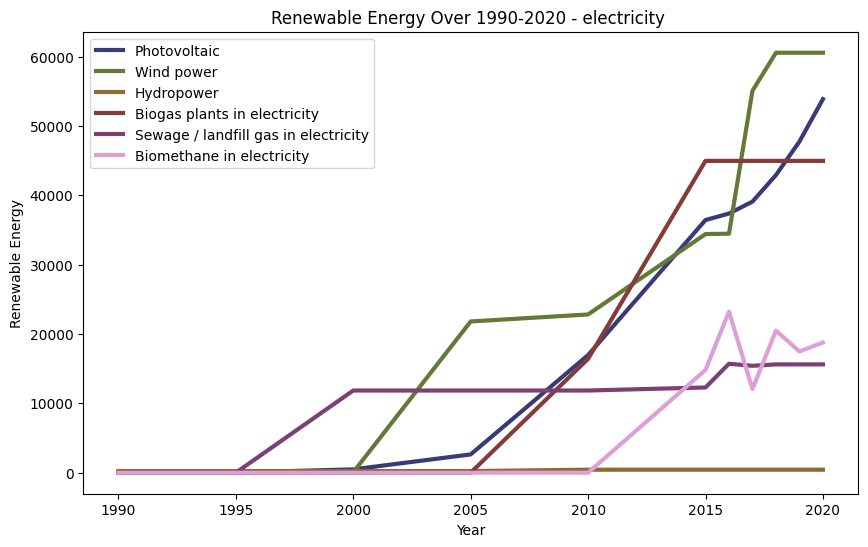

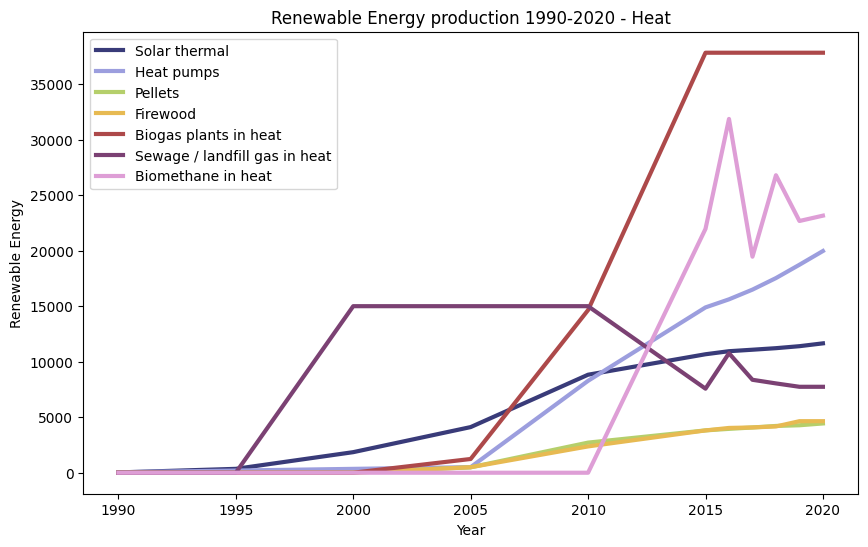

In [9]:

# plot  

#  The columns for the first and second pictures
columns_electricity = ['Photovoltaic', 'Wind power', 'Hydropower', 'Biogas plants in electricity',
                      'Sewage / landfill gas in electricity', 'Biomethane in electricity']

columns_heat = ['Solar thermal', 'Heat pumps', 'Pellets', 'Firewood',
                       'Biogas plants in heat', 'Sewage / landfill gas in heat', 'Biomethane in heat']

# Plotting the columns_electricity picture
renewable_energy[columns_electricity].plot(
    
    kind='line',
    figsize=(10, 6),
    colormap='tab20b',
    linewidth=3,
    title='Renewable Energy Over 1990-2020 - electricity ',
)

# Set labels
plt.xlabel('Year')
plt.ylabel('Renewable Energy')

# Show the first plot
plt.show()

# Plotting the columns_heat picture
renewable_energy[columns_heat].plot(
    kind='line' ,
    figsize=(10, 6),
    colormap='tab20b',
    linewidth=3,
    title='Renewable Energy production 1990-2020 - Heat',
)

# Set labels
plt.xlabel('Year')
plt.ylabel('Renewable Energy')

# Show the second plot
plt.show()



In [10]:
renewable_energy.reset_index('year', inplace=True)


In [11]:
#### The second dataset co2 emissions  


#store each sheet in a data frame >>>  then creat a new CO2emissions data frame from these data frames (merge them!):
co2_emissions_sectors  = pd.read_excel(co2_emissions_url, sheet_name=0) # the first sheet (at 0) define CO2emissions by sectors
co2_emissions_sectors =co2_emissions_sectors.rename(columns={'CO2-Emissionen nach Sektoren in (t)': 'year'} ) #rename the CO2-Emissionen nach Sektoren column into >>> year. This step for merge the two dataframes alnog the "year" column


co2_emissions_applications = pd.read_excel(co2_emissions_url, sheet_name=1)# the second sheet (at 1) define CO2emissions by application
co2_emissions_applications =co2_emissions_applications.rename(columns={'CO2-Emissionen nach Anwendungen in (kt)': 'year'} ) #rename the CO2-Emissionen nach Anwendungen column into >>> year 

# merge the data of the CO2emissions_sectors and CO2emissions_applications 
co2_emissions = pd.merge(co2_emissions_sectors, co2_emissions_applications,  on='year' ) #merge the two exel sheets into one datafram. cO2_emissions_applications.index.name = 'CO2 emissions according to applications in (KT)' # put the dataset topic in the first(index) column
 # Drop the unnesseciry columns   columns 


### process the merged dataFrame CO2emissions   
co2_emissions.rename(columns={
    'year': 'year',
    'Private Haushalte': 'Private households',
    'Gewerbe + Sonstiges': 'Trade and others',
    'Industrie': 'Industry',
    'Verkehr_x':'Transport',
    'Wärme': 'Heat', # Kt >> convert to t!!
    'Strom': 'Electricity', # Kt!!
    'Gesamt_y': 'Total_co2', # Kt and update to the new values!!
    'Gesamt in % zu 1990': 'Total as of 1990'  # update to the new values!!
     }    ,inplace=True)

co2_emissions = co2_emissions.drop(columns=[col for col in ['Verkehr in %', 'Gesamt_x', 'Wärme in %', 'Strom in %', 'Verkehr_y'] if col in co2_emissions.columns], axis=1)

co2_emissions['Heat']= co2_emissions['Heat']*1000
co2_emissions['Electricity'] = co2_emissions['Electricity']*1000
co2_emissions['Total_co2'] = co2_emissions.iloc[:, 1:-2].sum(axis=1)
co2_emissions['Total as of 1990'] = ((co2_emissions['Total_co2'] - co2_emissions['Total_co2'].iloc[0]) / co2_emissions['Total_co2'].iloc[0]) 


#Cleaning data and replacing missing values
co2_emissions.fillna(0, inplace=True)
#######################################################




In [12]:
co2_emissions.head(50)

,year,Private households,Trade and others,Industry,Transport,Heat,Electricity,Total_co2,Total as of 1990
0,1990,817146.280496,846374.365518,293939.743986,660748.806226,1.120973e+06,836487.800000,4.575670e+06,0.000000
1,1995,774039.745963,801725.975522,278433.678515,649866.500561,1.055941e+06,798258.216000,4.358265e+06,-0.047513
2,2000,773328.016727,800988.788810,278177.658859,638984.194897,1.058948e+06,793546.832000,4.343973e+06,-0.050637
3,2005,806450.639618,835296.157763,290092.361925,628101.889233,9.614061e+05,970433.036634,4.491780e+06,-0.018334
4,2010,684161.375550,735889.940880,185496.828653,622684.731430,7.880783e+05,817469.875512,3.833781e+06,-0.162138
5,2015,636894.098977,629441.403926,217637.183252,596134.946082,7.446007e+05,739371.946216,3.564080e+06,-0.221080
6,2016,607277.947909,632025.211201,214250.898995,598972.703684,7.553259e+05,698228.112507,3.506081e+06,-0.233756
7,2017,578793.984793,623804.379543,215604.505102,593667.548910,7.686083e+05,649594.561599,3.430073e+06,-0.250367
8,2018,588419.949975,592654.296510,232468.641927,588925.588842,7.778818e+05,635661.057120,3.416011e+06,-0.253440
9,2019,533848.636234,549176.926239,225833.358416,582527.299609,7.073147e+05,601544.172097,3.200245e+06,-0.300595


In [13]:
co2_emissions.set_index('year' , inplace=True)


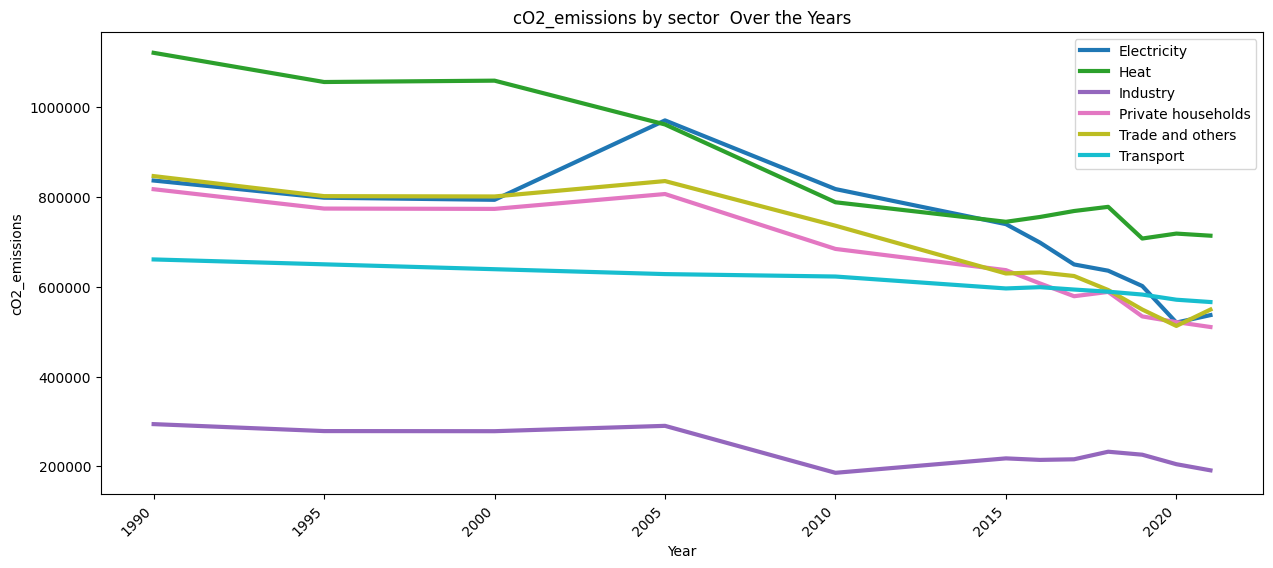

In [14]:
# Plotting
exclude = ['Total_co2',	'Total as of 1990']

co2_emissions.loc[:, co2_emissions.columns.difference(exclude)].plot(
    kind='line',
    figsize=(15, 6),
    colormap='tab10',
    linewidth=3,
    title='cO2_emissions by sector  Over the Years',
)

# Set labels
plt.xlabel('Year')
plt.xticks(rotation=45, ha='right')  # Adjust the rotation angle and alignment for clear representation

plt.ylabel('cO2_emissions')
plt.ticklabel_format(axis='y', style='plain')
# Show the plot
plt.show()

In [15]:
co2_emissions.reset_index('year' , inplace=True)


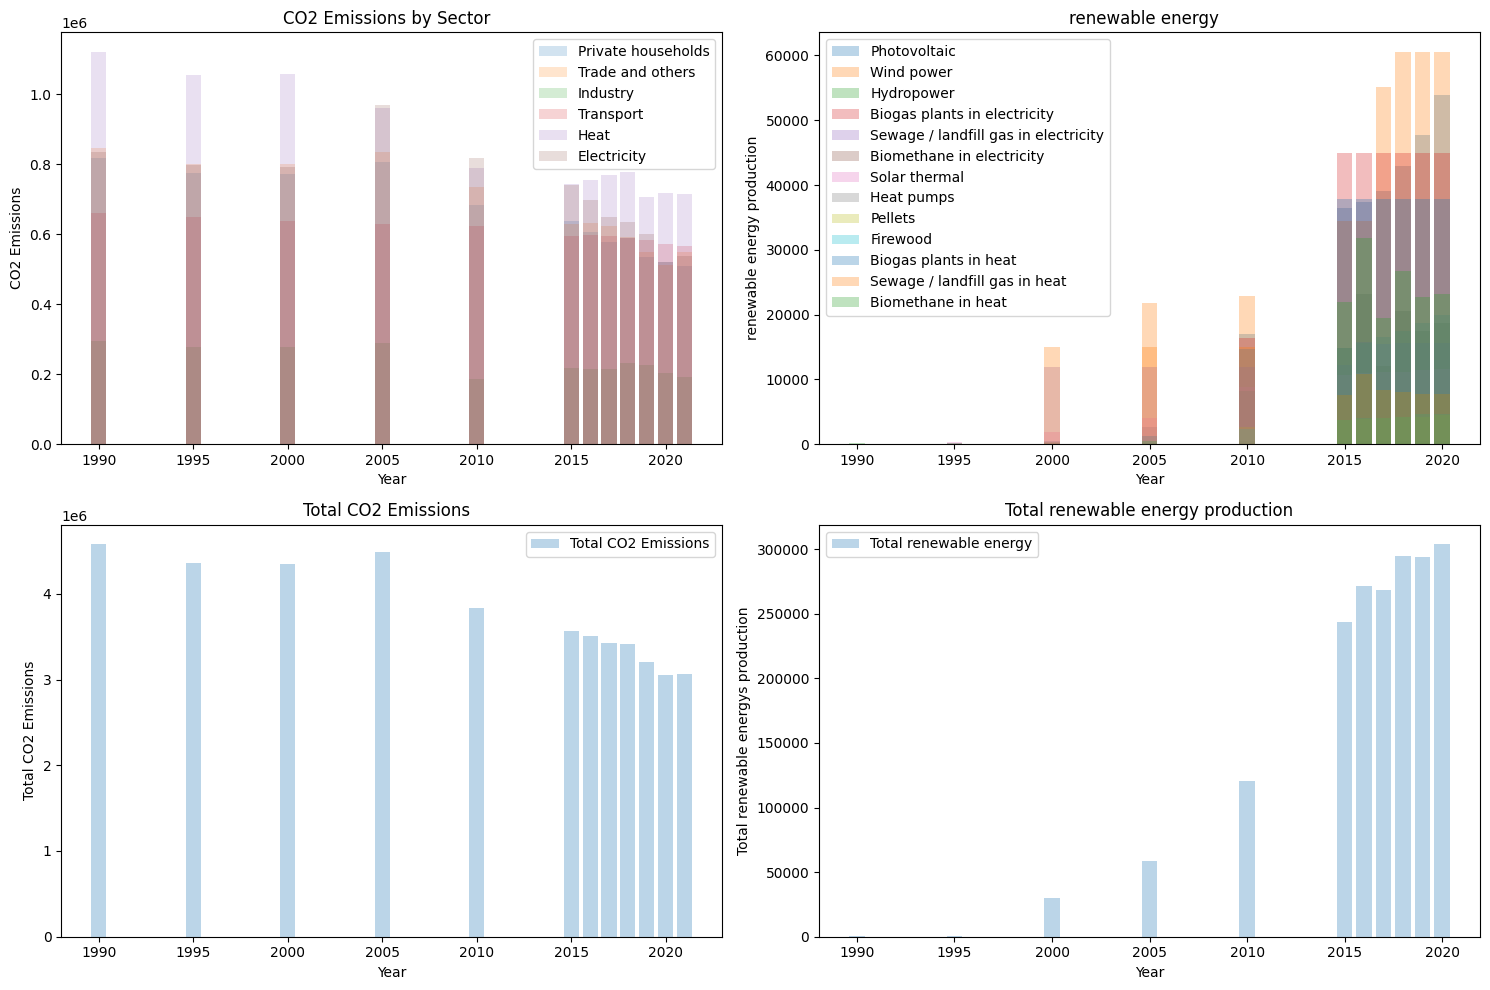

In [16]:
### plot alllllll 


# The columns to plot 
co2_emissions_clms_to_plot =  ['Private households', 'Trade and others', 'Industry','Transport', 'Heat', 'Electricity']

renewable_energy_clms_to_plot = ['Photovoltaic', 'Wind power', 'Hydropower',
       'Biogas plants in electricity', 'Sewage / landfill gas in electricity',
       'Biomethane in electricity' , 'Solar thermal',
       'Heat pumps', 'Pellets', 'Firewood', 'Biogas plants in heat',
       'Sewage / landfill gas in heat', 'Biomethane in heat']

 

# 
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Plot for co2   
for idx, sector in enumerate(co2_emissions_clms_to_plot):
    axs[0, 0].bar(co2_emissions['year'], co2_emissions[sector], label=sector,   alpha=0.2)

axs[0, 0].set_xlabel('Year')
axs[0, 0].set_ylabel('CO2 Emissions')
axs[0, 0].set_title(f'CO2 Emissions by Sector  ')
axs[0, 0].legend()


# Plot for renwable 
for idx, sector in enumerate(renewable_energy_clms_to_plot):
    axs[0, 1].bar(renewable_energy['year'], renewable_energy[sector], label=sector, alpha=0.3)

axs[0, 1].set_xlabel('Year')
axs[0, 1].set_ylabel('renewable energy production')
axs[0, 1].set_title(f'renewable energy  ')
axs[0, 1].legend()

# Plot Total CO2 Emissions
axs[1, 0].bar(co2_emissions['year'], co2_emissions['Total_co2'], label='Total CO2 Emissions', alpha=0.3)

axs[1, 0].set_xlabel('Year')
axs[1, 0].set_ylabel('Total CO2 Emissions')
axs[1, 0].set_title(f'Total CO2 Emissions  ')
axs[1, 0].legend()

# Plot for Total renewable energys
axs[1, 1].bar(renewable_energy['year'], renewable_energy['Total RE production'], label='Total renewable energy', alpha=0.3)

axs[1, 1].set_xlabel('Year')
axs[1, 1].set_ylabel('Total renewable energys production')
axs[1, 1].set_title(f'Total renewable energy production')
axs[1, 1].legend()

plt.tight_layout()
plt.show()


In [17]:
 #### THe third dataset co2 emissions by energy source

co2_emissions_energy_source = pd.read_excel(co2_emissions_url, sheet_name=2)# the third sheet (at 2) define CO2emissions by energy source

#rename and translate the columns 
column_mapping = {
    'CO2 Emissionen nach Energieträgern und Sektoren in 2021 in (t)':"CO2 Emissions by Energy Source and Sector (2021)",
    'Erdgas': 'Natural Gas',
    'Fernwärme': 'District Heating',
    'Heizöl': 'Heating Oil',
    'EE Wärme': 'Renewable Heat',
    'Kraftstoffmix Verkehr': 'Fuel Mix Traffic',
    'Strom': 'Electricity',
    'Summe': 'Total',
    'Anteil': 'Share'
}
# Rename columns
co2_emissions_energy_source.rename(columns=column_mapping, inplace=True)
co2_emissions_energy_source.set_index('CO2 Emissions by Energy Source and Sector (2021)', inplace=True)

# rename and translate the rows 
index_mapping = {
    'Private Haushalte': 'Private households',
    'Gewerbe+Sonstiges': 'Trade+Other',
    'Industrie': 'Industry',
    'Verkehr': 'Traffic',
    'Summe': 'Total',
    'Anteil': 'Share'
}

# Rename index (rows)
co2_emissions_energy_source.rename(index=index_mapping, inplace=True)


#Cleaning data and replacing missing values
co2_emissions_energy_source.fillna(0, inplace=True)



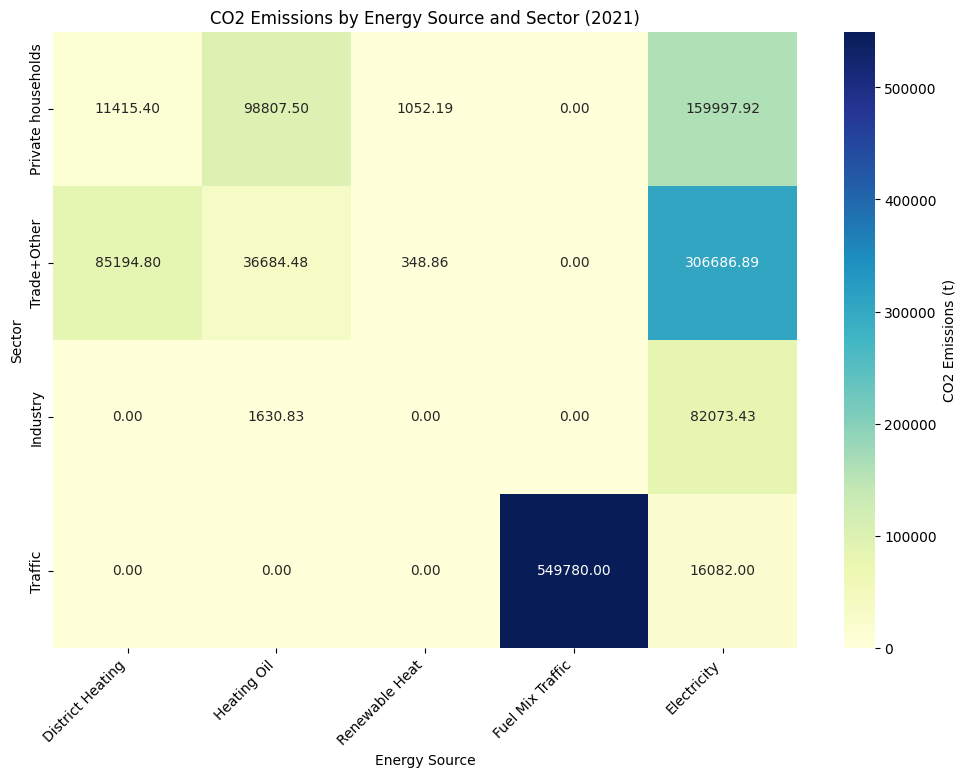

In [18]:
###plot heat map
 
# Select relevant rows and columns for the heatmap
data_to_heatmap = co2_emissions_energy_source.iloc[0:4, 1:-2]  # Select rows 0 to 3 and columns 1 to -2 (excluding the last column)

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data_to_heatmap, annot=True, fmt=".2f", cmap="YlGnBu", cbar_kws={'label': 'CO2 Emissions (t)'})

# Set labels and title
plt.title('CO2 Emissions by Energy Source and Sector (2021)')
plt.xlabel('Energy Source')
plt.xticks(rotation=45, ha='right')  # Adjust the rotation angle and alignment as needed
plt.ylabel('Sector')

# Show the plot
plt.show()


In [19]:
#Creating SQLite files
print("Creating CO2 Emissions Energy and Renewable Energy SQLite files: ")
sqlite_path = '../data/co2_emissions_renewable_energy.sqlite'
engine = create_engine(f'sqlite:///{sqlite_path}')

print("creating CO2 Emissions data table ...")
co2_emissions.to_sql("co2_emissions_table", engine, if_exists='replace', index=False)
   
     
print("creating Renewable Energy data table...")
renewable_energy.to_sql("renewable_energy_table", engine ,if_exists='replace', index=False)

print("creating CO2 Emissions by Energy Source data table...")
co2_emissions_energy_source.to_sql("co2_emissions_energy_source_table", engine ,if_exists='replace', index=True)# index=True

 
    
print("SQLite files created successfully!!!")

Creating CO2 Emissions Energy and Renewable Energy SQLite files: 
creating CO2 Emissions data table ...
creating Renewable Energy data table...
creating CO2 Emissions by Energy Source data table...
SQLite files created successfully!!!


## Time Series Forecasting

In this section, co2_emissions dataset is extended by reindexing it to cover the years from 1990 to 2020. This approach is  useful to fill in missing years and create a continuous time series for analysis. The original dataset is slightly .... for studying purpuse. 

Box-Jenkins Models:
Box-Jenkins Approach	The Box-Jenkins ARMA model is a combination of the AR and MA models.

The Box-Jenkins model assumes that the time series is stationary. Box and Jenkins recommend differencing non-stationary series one or more times to achieve stationarity. Doing so produces an ARIMA model, with the "I" standing for "Integrated".


### Co2 Emissions Forecasting:

In [20]:
# Extend the co2_emissions dataset to cover each year in 1990 - 2021
co2_emissions_extended = co2_emissions 
co2_emissions_extended.set_index('year' , inplace=True)
co2_emissions_extended= co2_emissions.reindex(range(1990, 2021)) # extend the datset

In [21]:
co2_emissions_extended.head(50)

,Private households,Trade and others,Industry,Transport,Heat,Electricity,Total_co2,Total as of 1990
year,,,,,,,,
1990,817146.280496,846374.365518,293939.743986,660748.806226,1.120973e+06,836487.800000,4.575670e+06,0.000000
1991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1995,774039.745963,801725.975522,278433.678515,649866.500561,1.055941e+06,798258.216000,4.358265e+06,-0.047513
1996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
co2_emissions_extended.index = pd.to_datetime(co2_emissions_extended.index, format='%Y')

In [23]:
#interpolate missing values in the numeric columns   (co2_emissions_extended).
#Interpolation is a common technique to estimate missing values based on the values of neighboring data points. 

numeric_columns = co2_emissions_extended.columns.difference(['year','Total','Total as of 1990' ] )

for column in numeric_columns:
    for index in range(26): 
        if pd.isnull(co2_emissions_extended[column].iloc[index]):
            co2_emissions_extended.interpolate(method='linear', inplace=True, limit_direction='both') #..
 

In [24]:
column_to_drop = 'Total as of 1990' #to avoid The column does not exist error.
if column_to_drop in co2_emissions_extended.columns:
    co2_emissions_extended = co2_emissions_extended.drop([column_to_drop], axis=1)
    print(f"The column '{column_to_drop}' was dropped.")
else:
    print(f"The column '{column_to_drop}' does not exist.")
    
#update the dataframe  
co2_emissions_extended['Total_co2'] = co2_emissions_extended.iloc[:, 1:-1].sum(axis=1)


The column 'Total as of 1990' was dropped.


In [25]:
co2_emissions_extended

,Private households,Trade and others,Industry,Transport,Heat,Electricity,Total_co2
year,,,,,,,
1990-01-01,817146.280496,846374.365518,293939.743986,660748.806226,1.120973e+06,836487.800000,3.758523e+06
1991-01-01,808524.973589,837444.687519,290838.530892,658572.345093,1.107966e+06,828841.883200,3.723664e+06
1992-01-01,799903.666683,828515.009520,287737.317798,656395.883960,1.094960e+06,821195.966400,3.688804e+06
1993-01-01,791282.359776,819585.331521,284636.104703,654219.422827,1.081954e+06,813550.049600,3.653945e+06
1994-01-01,782661.052869,810655.653522,281534.891609,652042.961694,1.068947e+06,805904.132800,3.619085e+06
1995-01-01,774039.745963,801725.975522,278433.678515,649866.500561,1.055941e+06,798258.216000,3.584226e+06
1996-01-01,773897.400115,801578.538180,278382.474584,647690.039429,1.056542e+06,797315.939200,3.581509e+06
1997-01-01,773755.054268,801431.100837,278331.270653,645513.578296,1.057144e+06,796373.662400,3.578793e+06
1998-01-01,773612.708421,801283.663495,278280.066722,643337.117163,1.057745e+06,795431.385600,3.576077e+06


In [26]:
#co2_emissions_extended.index = co2_emissions_extended.index.to_period('Y')


Data Transformation To Achieve Stationarity:

Now, it is important to perform some data transformation to achieve Stationarity. Common transformations include differencing and logarithmization. Another option is to use a non-stationary model, such as a random walk model, to forecast the time series.

 For educational purposes, the chosen approach involves applying the ARIMA model with transformation techniques. This method aims to enhance the stationarity of the time series data, making it more suitable for analysis and forecasting within the ARIMA framework. Through experimentation, it has been determined that log transformation is the most effective for the choosen dataset.



In [27]:
def test_stationarity_(df):
    results_summary = []  # List to store the results for each column

    for column in df.columns:
        # Determine rolling statistics
        movingAverage = df[column].rolling(window=10).mean()
        movingSTD = df[column].rolling(window=10).std()

        # Plot rolling statistics
        plt.figure(figsize=(10, 5))
        plt.plot(df[column], color='blue', label='Original')
        plt.plot(movingAverage, color='red', label='Rolling Mean')
        plt.plot(movingSTD, color='black', label='Rolling Std')
        plt.legend(loc='best')
        plt.title(f'Rolling Mean & Standard Deviation - {column}')
        plt.show(block=False)

        # Perform Dickey–Fuller test:
        print(f'Results of Dickey Fuller Test for {column}:')
        elecom_test = adfuller(df[column], autolag='AIC')
        dfoutput = pd.Series(elecom_test[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
        for key, value in elecom_test[4].items():
            dfoutput['Critical Value (%s)' % key] = value
        print(dfoutput)

        # Append the results to the summary list
        results_summary.append((column, dfoutput))

    # Print summary for all columns
    '''for column, result in results_summary:
        print(f'Summary for {column}:')
        print(result)
        print('\n')'''
 


In [117]:
co2_emissions_log = np.log(co2_emissions_extended) # apply log transform


In [118]:
co2_emissions_log

,Private households,Trade and others,Industry,Transport,Heat,Electricity,Total_co2
year,,,,,,,
1990-01-01,13.613573,13.648717,12.591130,13.401129,13.929707,13.636967,15.139537
1991-01-01,13.602967,13.638110,12.580524,13.397830,13.918037,13.627785,15.130219
1992-01-01,13.592247,13.627390,12.569803,13.394519,13.906228,13.618517,15.120813
1993-01-01,13.581410,13.616554,12.558967,13.391198,13.894279,13.609163,15.111318
1994-01-01,13.570455,13.605599,12.548012,13.387866,13.882185,13.599720,15.101732
1995-01-01,13.559379,13.594522,12.536935,13.384522,13.869943,13.590187,15.092053
1996-01-01,13.559195,13.594338,12.536751,13.381168,13.870512,13.589006,15.091295
1997-01-01,13.559011,13.594154,12.536567,13.377802,13.871081,13.587824,15.090536
1998-01-01,13.558827,13.593970,12.536383,13.374424,13.871650,13.586640,15.089777


For time series to be stationary, we need to ensure that both Rolling Mean and Rolling Standard Deviation remain fairly constant WRT time. 

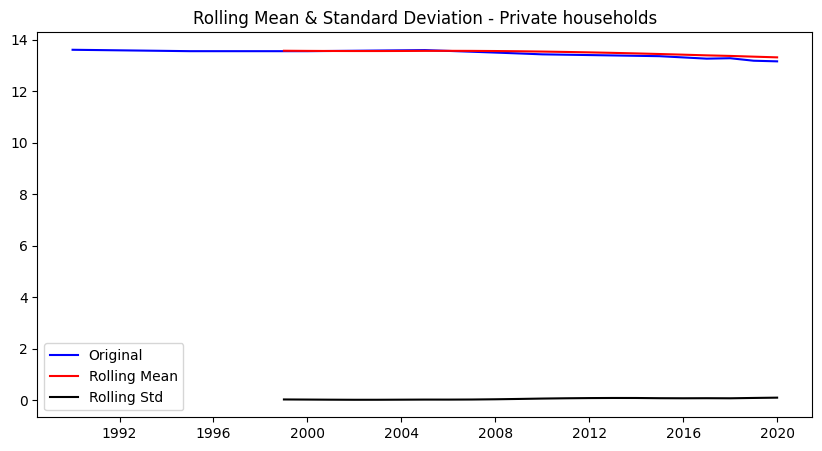

Results of Dickey Fuller Test for Private households:
Test Statistic                  2.678894
p-value                         0.999086
#Lags Used                      0.000000
Number of Observations Used    30.000000
Critical Value (1%)            -3.669920
Critical Value (5%)            -2.964071
Critical Value (10%)           -2.621171
dtype: float64


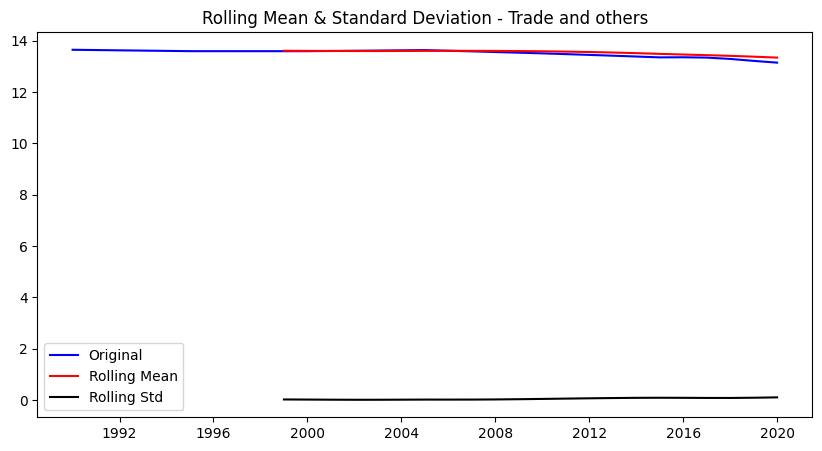

Results of Dickey Fuller Test for Trade and others:
Test Statistic                  2.347742
p-value                         0.998984
#Lags Used                      2.000000
Number of Observations Used    28.000000
Critical Value (1%)            -3.688926
Critical Value (5%)            -2.971989
Critical Value (10%)           -2.625296
dtype: float64


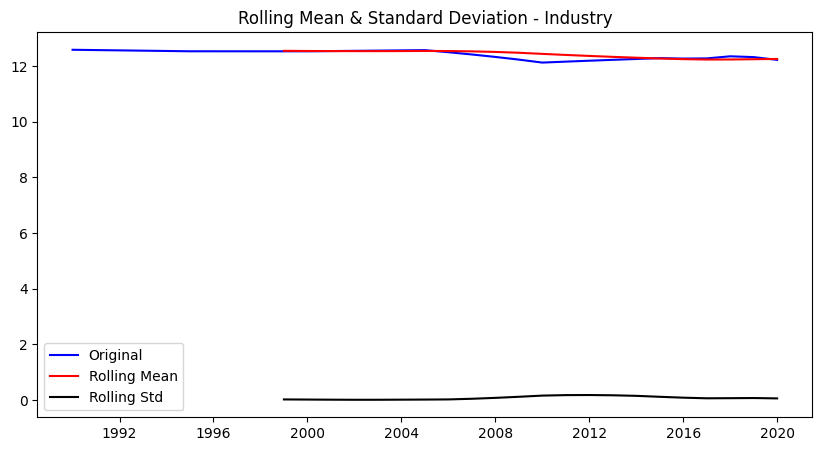

Results of Dickey Fuller Test for Industry:
Test Statistic                  1.596504
p-value                         0.997847
#Lags Used                      8.000000
Number of Observations Used    22.000000
Critical Value (1%)            -3.769733
Critical Value (5%)            -3.005426
Critical Value (10%)           -2.642501
dtype: float64


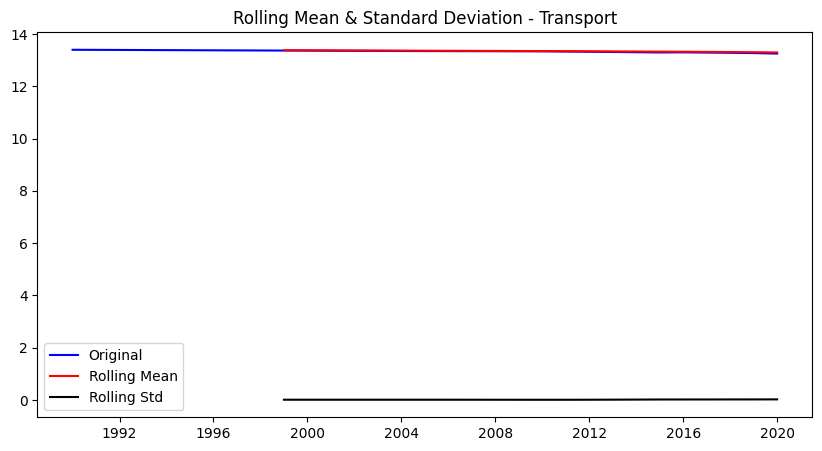

Results of Dickey Fuller Test for Transport:
Test Statistic                  1.376498
p-value                         0.997005
#Lags Used                      9.000000
Number of Observations Used    21.000000
Critical Value (1%)            -3.788386
Critical Value (5%)            -3.013098
Critical Value (10%)           -2.646397
dtype: float64


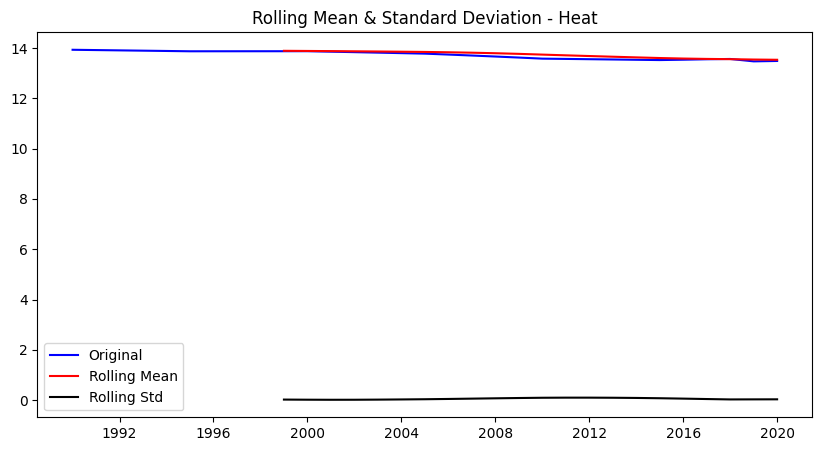

Results of Dickey Fuller Test for Heat:
Test Statistic                  0.037779
p-value                         0.961547
#Lags Used                      0.000000
Number of Observations Used    30.000000
Critical Value (1%)            -3.669920
Critical Value (5%)            -2.964071
Critical Value (10%)           -2.621171
dtype: float64


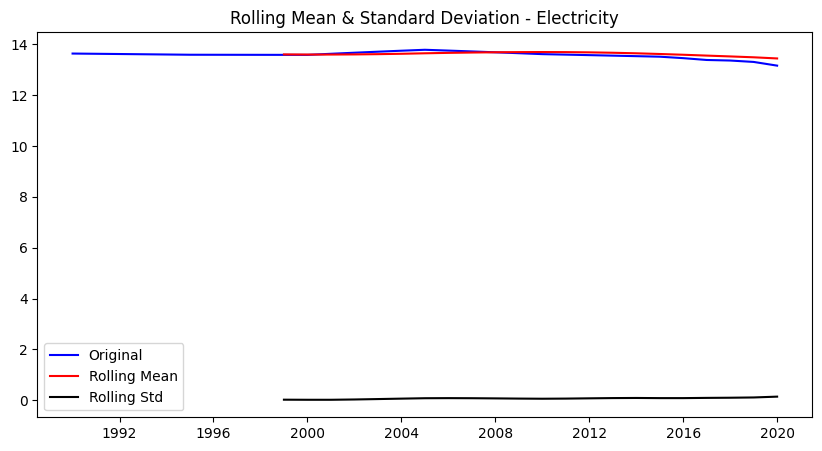

Results of Dickey Fuller Test for Electricity:
Test Statistic                  1.286657
p-value                         0.996533
#Lags Used                      1.000000
Number of Observations Used    29.000000
Critical Value (1%)            -3.679060
Critical Value (5%)            -2.967882
Critical Value (10%)           -2.623158
dtype: float64


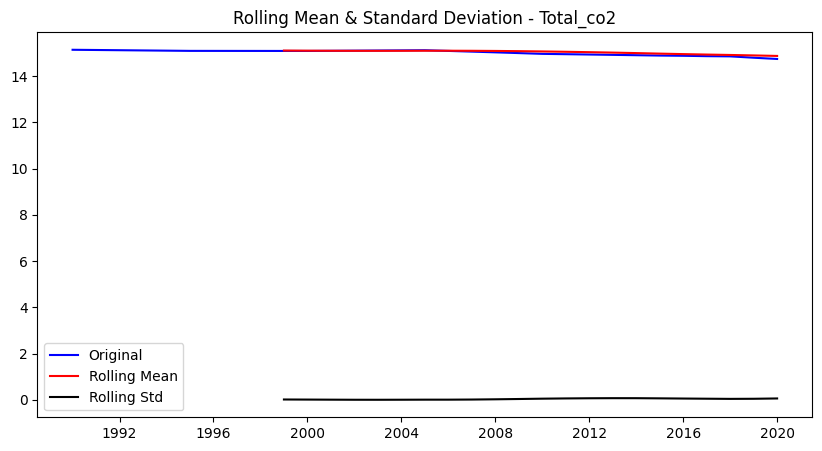

Results of Dickey Fuller Test for Total_co2:
Test Statistic                  3.332722
p-value                         1.000000
#Lags Used                      8.000000
Number of Observations Used    22.000000
Critical Value (1%)            -3.769733
Critical Value (5%)            -3.005426
Critical Value (10%)           -2.642501
dtype: float64


In [119]:
test_stationarity_(co2_emissions_log)

Time Series Decomposition: is a technique used to break down a time series into its constituent components, such as trend, seasonality, and residual or noise. It provides valuable insights and helps in understanding the underlying patterns and variations in the data.

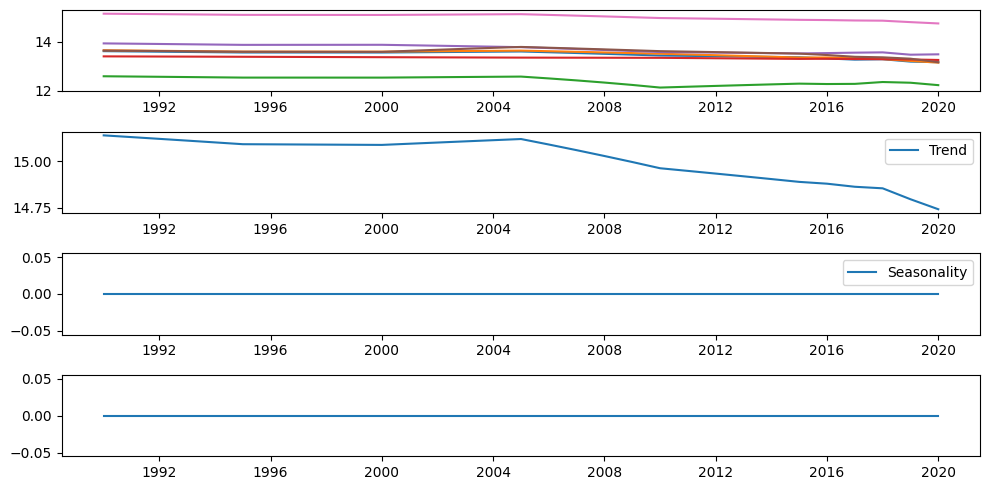

In [31]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

#   
decomposition = seasonal_decompose(co2_emissions_log['Total_co2'])

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(10, 5))
plt.subplot(411)
plt.plot(co2_emissions_log, label='Original')
#plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residuals')
#plt.legend(loc='best')
plt.tight_layout()

plt.show()


The trend is downward indicating a general decreasing in co2 emissions. Flat residuals and seasonality indicate that the trend components explain most of the variability in the data.

Text(0.5, 1.0, 'Rolling Mean & Standard Deviation')

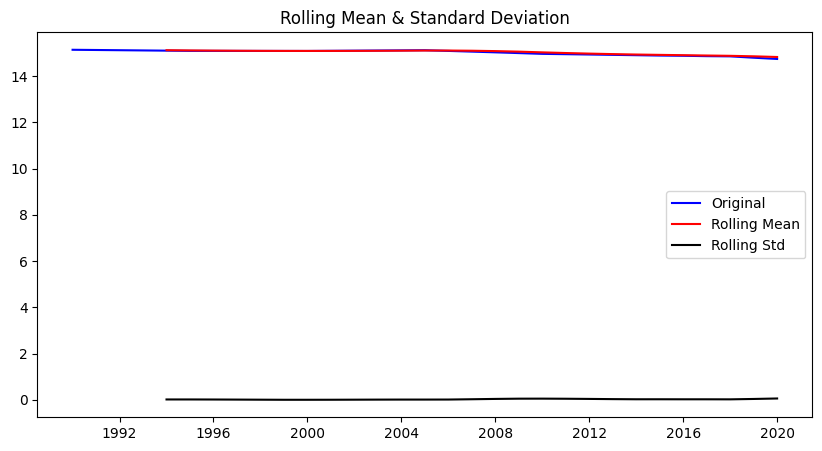

In [32]:
co2_decompose = decomposition.trend
co2_decompose.dropna(inplace=True)

rollmean_decompose = co2_decompose.rolling(window=5).mean()
rollstd_decompose = co2_decompose.rolling(window=5).std()

plt.figure(figsize=(10,5))
plt.plot(co2_decompose, color='blue', label='Original')
plt.plot(rollmean_decompose, color='red', label='Rolling Mean')
plt.plot(rollstd_decompose, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')

ACF and PACF plot: is a bar chart of coefficients of correlation between a time series and it lagged values. By interpreting the ACF plot,an informed decisions could be made about the nature of the time series and about appropriate models for forecasting. Partial autocorrelations gives the partial correlation of a stationary time series with its own lagged values. PACF are useful in identifying the order of an autoregressive model. Both of them are valuable tools in the exploratory phase of time series analysis. 

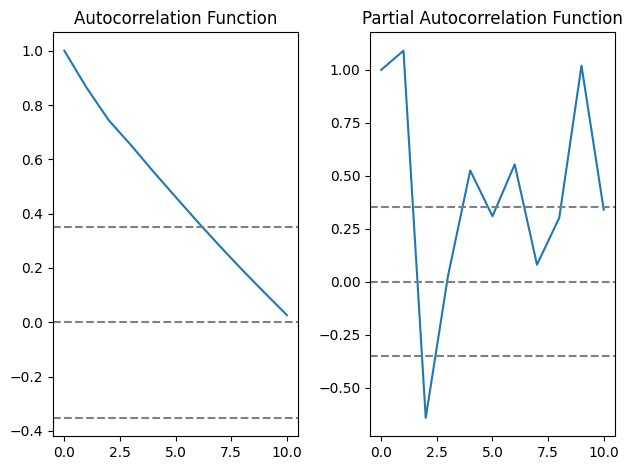

In [33]:
lag_acf = acf(co2_emissions_log['Total_co2'], nlags=10)
lag_pacf = pacf(co2_emissions_log['Total_co2'], nlags=10, method='ols')
#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(co2_emissions_log)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(co2_emissions_log)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')            

#Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(co2_emissions_log)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(co2_emissions_log)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
            
plt.tight_layout()

The autocorrelation function shows a slow decay, which means that the future values have a very high correlation with its past values. The partial autocorrelation function shows a high correlation with the first lag, we could start our modeling with an AR(2) model and compare this with an AR(3).

 ####  ARIMA Model:    


 

In [34]:

'''
 #Grid Search ARIMA Model Hyperparameters  
 
 #involves systematically evaluating different combinations of the order parameter values (p, d, q) 
 # to find the set of parameters that minimizes a chosen metric,
 #such as the Mean Squared Error (MSE) or another performance metric. 
 
# grid search
# Evaluate an ARIMA model for a given order (p, d, q)
def evaluate_arima_model(train, test, order, clm):
    # Fit the model
    model = ARIMA(train[clm], order=order)
    model_fit = model.fit()

    # Make predictions
    predictions = model_fit.forecast(steps=len(test))

    # Calculate RMSE
    rmse = sqrt(mean_squared_error(test[clm], predictions))
    print('ARIMA%s RMSE for %s=%.3f' % (order, clm, rmse))

    return rmse

# Evaluate combinations of p, d, and q values for an ARIMA model
def evaluate_models(train, test, p_values, d_values, q_values, clm):
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p, d, q)
                try:
                    rmse = evaluate_arima_model(train, test, order, clm)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
    
    

 

# Choose dataset and column here:  

clm_to_predict = 'Total_co2'
train_size = int(len(co2_emissions_log) * 0.66)
train, test = co2_emissions_log[0:train_size], co2_emissions_log[train_size:]  

# Evaluate parameters , this could be changed
p_values = range(0, 15)
d_values = range(0, 5)
q_values = range(0, 5)

warnings.filterwarnings("ignore")
evaluate_models(train, test, p_values, d_values, q_values, clm_to_predict) 
# Output, Total_co2, co2_emissions_log:  Best ARIMA(9, 2, 4) RMSE=0.017 
'''

'\n #Grid Search ARIMA Model Hyperparameters  \n \n #involves systematically evaluating different combinations of the order parameter values (p, d, q) \n # to find the set of parameters that minimizes a chosen metric,\n #such as the Mean Squared Error (MSE) or another performance metric. \n \n# grid search\n# Evaluate an ARIMA model for a given order (p, d, q)\ndef evaluate_arima_model(train, test, order, clm):\n    # Fit the model\n    model = ARIMA(train[clm], order=order)\n    model_fit = model.fit()\n\n    # Make predictions\n    predictions = model_fit.forecast(steps=len(test))\n\n    # Calculate RMSE\n    rmse = sqrt(mean_squared_error(test[clm], predictions))\n    print(\'ARIMA%s RMSE for %s=%.3f\' % (order, clm, rmse))\n\n    return rmse\n\n# Evaluate combinations of p, d, and q values for an ARIMA model\ndef evaluate_models(train, test, p_values, d_values, q_values, clm):\n    best_score, best_cfg = float("inf"), None\n    for p in p_values:\n        for d in d_values:\n      

Implementing a time series forecasting approach using the ARIMA (AutoRegressive Integrated Moving Average) model.

In [35]:
from statsmodels.tsa.arima.model import ARIMA

## co2 After log transform 


# split into train and test sets, The split is coherent and not random,
# this is a common practice in time series forecasting to maintain temporal order. 
train = co2_emissions_log.loc['1990-01-01':'2015-01-01']
test = co2_emissions_log.loc['2014-01-01':'2021-01-01']



# The ARIMA model order is specified as (p, d, q),
# p is the order of the autoregressive (AR) component, 
# d is the degree of differencing, 
# q is the order of the moving average (MA) component.

order = (9, 2, 4)  # <- plug-in p, d, q here# based on grid search, acf and pacf

history = [x for x in train]

#Predictions are stored in forecast_results and predictions DataFrames.

# Create a DataFrame to save forecast results
start_date = '2021-01-01'
end_date = '2025-01-01'
date_range = pd.date_range(start=start_date, end=end_date, freq='AS-JAN')
forecast_results = pd.DataFrame(index=date_range, columns=train.columns)
results = pd.DataFrame(index=test.index, columns=train.columns)

# Create an empty DataFrame for predictions
predictions = pd.DataFrame(index=test.index, columns=train.columns)  


# walk-forward validation
for t in range(len(test)):
    for clm in train.columns:
        # fit model
        model_log = ARIMA(train[clm], order=order)
        model_fit = model_log.fit()
        

        results_ARIMA = model_fit.forecast(10)
        #print ( 'results_ARIMA ', results_ARIMA)
        forecast_results[clm] = results_ARIMA  
        
        yhat = results_ARIMA[t]
        predictions.at[test.index[t], clm] = yhat   
        observations = test[clm].iloc[t]
        
        history.append(observations)

        results.at[test.index[t], clm] = {'predicted': yhat, 'expected': observations}  # Store results in the new DataFrame
        #print('clm name   ', clm, '   predicted=%f, expected=%f' % (yhat, observations))
        

#print(model_fit.summary())


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Library/Fra

##### Evaluate the model:

In [2]:

# Calculate error metrics
mse = mean_squared_error(test, predictions)
mae = mean_absolute_error(test, predictions)
rmse = np.sqrt(mse)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')


NameError: name 'mean_squared_error' is not defined

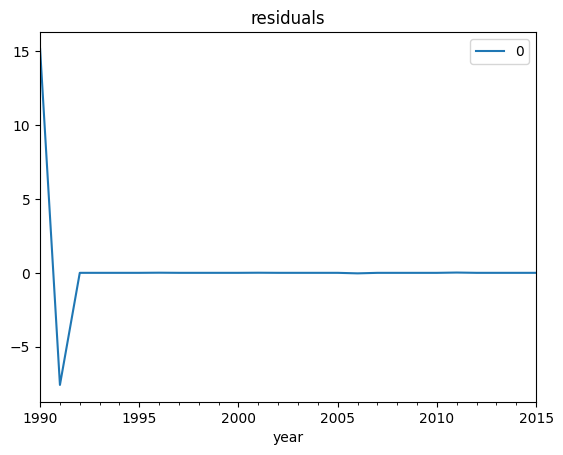

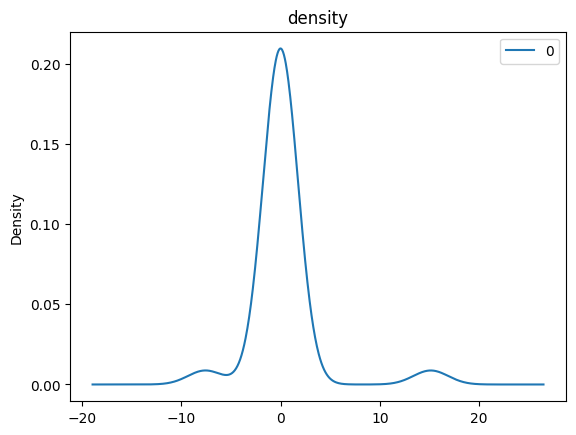

                  0
count  2.600000e+01
mean   2.905648e-01
std    3.373157e+00
min   -7.579086e+00
25%   -2.224911e-04
50%   -8.847612e-05
75%   -5.762725e-07
max    1.513954e+01


In [40]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(title='residuals')
plt.show()
# density plot of residuals
residuals.plot(kind='kde', title='density')
plt.show()
# summary stats of residuals
print(residuals.describe())

To invert the logarithmic transformation and get back the original values, the exponential function is used.

In [41]:
predictions = predictions.astype(float) #prepare for exp function application
# combine all the past data  with the future data
co2_future = pd.concat([ np.exp(train) ,  np.exp(predictions),  np.exp(forecast_results)], axis=0) #inverse log is exp

In [42]:
co2_future.head(50)

,Private households,Trade and others,Industry,Transport,Heat,Electricity,Total_co2
1990-01-01,817146.280496,846374.365518,293939.743986,660748.806226,1.120973e+06,836487.800000,3.758523e+06
1991-01-01,808524.973589,837444.687519,290838.530892,658572.345093,1.107966e+06,828841.883200,3.723664e+06
1992-01-01,799903.666683,828515.009520,287737.317798,656395.883960,1.094960e+06,821195.966400,3.688804e+06
1993-01-01,791282.359776,819585.331521,284636.104703,654219.422827,1.081954e+06,813550.049600,3.653945e+06
1994-01-01,782661.052869,810655.653522,281534.891609,652042.961694,1.068947e+06,805904.132800,3.619085e+06
1995-01-01,774039.745963,801725.975522,278433.678515,649866.500561,1.055941e+06,798258.216000,3.584226e+06
1996-01-01,773897.400115,801578.538180,278382.474584,647690.039429,1.056542e+06,797315.939200,3.581509e+06
1997-01-01,773755.054268,801431.100837,278331.270653,645513.578296,1.057144e+06,796373.662400,3.578793e+06
1998-01-01,773612.708421,801283.663495,278280.066722,643337.117163,1.057745e+06,795431.385600,3.576077e+06
1999-01-01,773470.362574,801136.226152,278228.862790,641160.656030,1.058346e+06,794489.108800,3.573361e+06


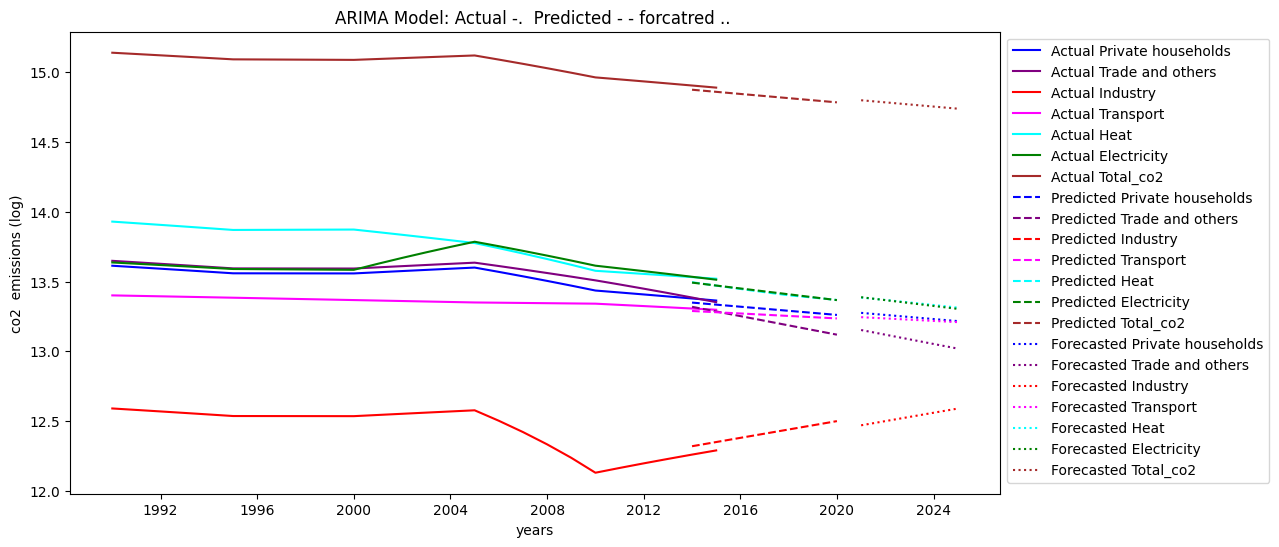

In [43]:
 
# Plot   ARIMA Model: Actual -.  Predicted - - forcatred .. 

plt.figure(figsize=(12, 6))
colors = ['blue','purple','red','magenta','cyan','green','brown']

# Plot actual training set
for i, clm in enumerate(train.columns):
    plt.plot(train.index, train[clm], label=f'Actual {clm}', linestyle='-', color=colors[i])

 
 
# Plot the predicted values
for i, clm in enumerate(predictions.columns):
    plt.plot(predictions.index, predictions[clm], label=f'Predicted {clm}', linestyle='--', color=colors[i])


# Plot   forecast results

for i, clm in enumerate(forecast_results.columns):
    plt.plot(forecast_results.index, forecast_results[clm], label=f'Forecasted {clm}', linestyle=':', color=colors[i])


plt.legend( bbox_to_anchor=(1, 1))
plt.title('ARIMA Model: Actual -.  Predicted - - forcatred .. ')
plt.xlabel('years')
plt.ylabel('co2  emissions (log)')

plt.show()


From the graph, there is a consistent effort to reduce CO2 emissions across various sectors which suggest a positive direction towards environmental sustainability.

In [ ]:
# Save the model :)
model_fit.save('arima_co2_emissions.pkl')

: 

### Renewable Energy Prediction:

In [44]:
renewable_energy

,year,Photovoltaic,Wind power,Hydropower,Biogas plants in electricity,Sewage / landfill gas in electricity,Biomethane in electricity,Total RE in electricity,Solar thermal,Heat pumps,Pellets,Firewood,Biogas plants in heat,Sewage / landfill gas in heat,Biomethane in heat,Total RE in heat,Total RE production
0,1990,0.00000,63.20,239.8,0.0,0.00,0,303.00000,24.840,42.96875,0.0,0.0,0.000,0.00,0,67.80875,370.80875
1,1995,28.01120,63.20,239.8,0.0,0.00,0,331.01120,349.140,195.31250,0.0,0.0,0.000,0.00,0,544.45250,875.46370
2,2000,482.53884,63.20,239.8,0.0,11850.00,0,12635.53884,1852.420,347.65625,12.5,0.0,0.000,15000.00,0,17212.57625,29848.11509
3,2005,2637.63906,21804.00,239.8,0.0,11850.00,0,36531.43906,4110.660,500.00000,487.5,495.0,1237.700,15000.00,0,21830.86000,58362.29906
4,2010,16953.45818,22815.20,436.0,16417.4,11850.00,0,68472.05818,8827.300,8277.50000,2712.5,2370.0,14649.420,15000.00,0,51836.72000,120308.77818
5,2015,36430.82880,34406.08,436.0,44952.2,12290.20,14816,143331.30880,10670.060,14890.00000,3812.5,3810.0,37828.736,7570.27,21963,100544.56600,243875.87480
6,2016,37358.18730,34456.64,436.0,44952.2,15708.24,23218,156129.26730,10944.818,15617.00000,3950.0,4033.8,37828.736,10762.24,31864,115000.59400,271129.86130
7,2017,39083.18440,55059.84,436.0,44952.2,15414.22,12059,167004.44440,11078.678,16492.00000,4075.0,4078.8,37828.736,8370.43,19457,101380.64400,268385.08840
8,2018,42910.06126,60545.60,436.0,44952.2,15617.32,20490,184951.18126,11217.598,17531.50000,4212.5,4168.2,37828.736,8043.99,26793,109795.52400,294746.70526
9,2019,47745.49056,60545.60,436.0,44952.2,15617.32,17479,186775.61056,11396.998,18731.50000,4275.0,4641.9,37828.736,7740.00,22673,107287.13400,294062.74456


In [45]:
renewable_energy_extended = renewable_energy.copy()  # Create a copy to avoid modifying the original DataFrame
 

In [46]:
renewable_energy_extended.set_index('year', inplace=True)

In [47]:
renewable_energy_extended.index = pd.to_datetime(renewable_energy_extended.index, format='%Y')
 


In [48]:
renewable_energy_extended

,Photovoltaic,Wind power,Hydropower,Biogas plants in electricity,Sewage / landfill gas in electricity,Biomethane in electricity,Total RE in electricity,Solar thermal,Heat pumps,Pellets,Firewood,Biogas plants in heat,Sewage / landfill gas in heat,Biomethane in heat,Total RE in heat,Total RE production
year,,,,,,,,,,,,,,,,
1990-01-01,0.00000,63.20,239.8,0.0,0.00,0,303.00000,24.840,42.96875,0.0,0.0,0.000,0.00,0,67.80875,370.80875
1995-01-01,28.01120,63.20,239.8,0.0,0.00,0,331.01120,349.140,195.31250,0.0,0.0,0.000,0.00,0,544.45250,875.46370
2000-01-01,482.53884,63.20,239.8,0.0,11850.00,0,12635.53884,1852.420,347.65625,12.5,0.0,0.000,15000.00,0,17212.57625,29848.11509
2005-01-01,2637.63906,21804.00,239.8,0.0,11850.00,0,36531.43906,4110.660,500.00000,487.5,495.0,1237.700,15000.00,0,21830.86000,58362.29906
2010-01-01,16953.45818,22815.20,436.0,16417.4,11850.00,0,68472.05818,8827.300,8277.50000,2712.5,2370.0,14649.420,15000.00,0,51836.72000,120308.77818
2015-01-01,36430.82880,34406.08,436.0,44952.2,12290.20,14816,143331.30880,10670.060,14890.00000,3812.5,3810.0,37828.736,7570.27,21963,100544.56600,243875.87480
2016-01-01,37358.18730,34456.64,436.0,44952.2,15708.24,23218,156129.26730,10944.818,15617.00000,3950.0,4033.8,37828.736,10762.24,31864,115000.59400,271129.86130
2017-01-01,39083.18440,55059.84,436.0,44952.2,15414.22,12059,167004.44440,11078.678,16492.00000,4075.0,4078.8,37828.736,8370.43,19457,101380.64400,268385.08840
2018-01-01,42910.06126,60545.60,436.0,44952.2,15617.32,20490,184951.18126,11217.598,17531.50000,4212.5,4168.2,37828.736,8043.99,26793,109795.52400,294746.70526


In [49]:
 
renewable_energy_extended.index = renewable_energy_extended.index.to_period('Y')
renewable_energy_extended = renewable_energy_extended.resample('Y').mean()  #  
renewable_energy_extended = renewable_energy_extended.interpolate()



In [50]:
#renewable_energy_extended.insert(0, 'years', pd.to_datetime(renewable_energy_extended.index.year) , format='%Y')
#renewable_energy_extended['years'] = pd.to_datetime( renewable_energy_extended['years'] , format='%Y')

In [51]:
renewable_energy_extended.index = pd.to_numeric(renewable_energy_extended.index)

renewable_energy_extended.index= range(1990, 2021)

In [52]:
#renewable_energy_extended['years'] = renewable_energy_extended['years'].astype(int)


In [53]:
renewable_energy_extended

,Photovoltaic,Wind power,Hydropower,Biogas plants in electricity,Sewage / landfill gas in electricity,Biomethane in electricity,Total RE in electricity,Solar thermal,Heat pumps,Pellets,Firewood,Biogas plants in heat,Sewage / landfill gas in heat,Biomethane in heat,Total RE in heat,Total RE production
1990,0.000000,63.200,239.80,0.00,0.00,0.0,303.000000,24.840,42.96875,0.0,0.0,0.0000,0.000,0.0,67.80875,370.808750
1991,5.602240,63.200,239.80,0.00,0.00,0.0,308.602240,89.700,73.43750,0.0,0.0,0.0000,0.000,0.0,163.13750,471.739740
1992,11.204480,63.200,239.80,0.00,0.00,0.0,314.204480,154.560,103.90625,0.0,0.0,0.0000,0.000,0.0,258.46625,572.670730
1993,16.806720,63.200,239.80,0.00,0.00,0.0,319.806720,219.420,134.37500,0.0,0.0,0.0000,0.000,0.0,353.79500,673.601720
1994,22.408960,63.200,239.80,0.00,0.00,0.0,325.408960,284.280,164.84375,0.0,0.0,0.0000,0.000,0.0,449.12375,774.532710
1995,28.011200,63.200,239.80,0.00,0.00,0.0,331.011200,349.140,195.31250,0.0,0.0,0.0000,0.000,0.0,544.45250,875.463700
1996,118.916728,63.200,239.80,0.00,2370.00,0.0,2791.916728,649.796,225.78125,2.5,0.0,0.0000,3000.000,0.0,3878.07725,6669.993978
1997,209.822256,63.200,239.80,0.00,4740.00,0.0,5252.822256,950.452,256.25000,5.0,0.0,0.0000,6000.000,0.0,7211.70200,12464.524256
1998,300.727784,63.200,239.80,0.00,7110.00,0.0,7713.727784,1251.108,286.71875,7.5,0.0,0.0000,9000.000,0.0,10545.32675,18259.054534
1999,391.633312,63.200,239.80,0.00,9480.00,0.0,10174.633312,1551.764,317.18750,10.0,0.0,0.0000,12000.000,0.0,13878.95150,24053.584812


In [56]:
from sklearn.linear_model import LinearRegression

train = renewable_energy_extended.loc[  renewable_energy_extended.index <= 2015]
test = renewable_energy_extended.loc[renewable_energy_extended.index >=  2015]

X = renewable_energy_extended.drop(['Total RE in heat', 'Total RE in electricity', 'Total RE production'], axis=1)
y = renewable_energy_extended['Total RE production']

X_train = train.drop(['Total RE in heat' , 'Total RE in electricity' , 'Total RE production' ], axis=1)
y_train = train['Total RE production']

# Define features (X) and target variable (y) for test set
X_test = test.drop(['Total RE in heat', 'Total RE in electricity' , 'Total RE production' ], axis=1)
y_test = test['Total RE production']

ml = LinearRegression()
ml.fit(X_train, y_train)

# Predict the target variable for the test set
y_pred = ml.predict(X_test)

# Compare predicted and actual values
predicted_value = y_pred
actual_value = y_test

 
print(predicted_value, actual_value)

[243875.8748     267302.34818105 269215.99550972 292100.54193124
 291993.55857901 300780.42341075] 2015    243875.87480
2016    271129.86130
2017    268385.08840
2018    294746.70526
2019    294062.74456
2020    303598.15400
Name: Total RE production, dtype: float64


In [57]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9861061811137577

Text(0.5, 1.0, 'Actual vs. Predicted')

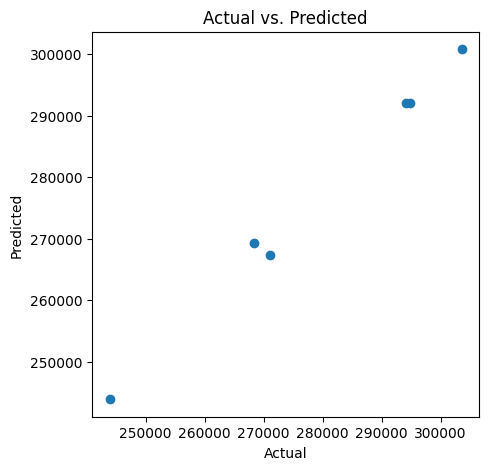

In [60]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')

In [61]:
import statsmodels.api as sm
model = sm.OLS(y, X ).fit()
print(model.summary2())



                              Results: Ordinary least squares
Model:                      OLS                        Adj. R-squared:            1.000     
Dependent Variable:         Total RE production        AIC:                       -1212.1605
Date:                       2024-01-04 22:34           BIC:                       -1196.3866
No. Observations:           31                         Log-Likelihood:            617.08    
Df Model:                   10                         F-statistic:               7.176e+28 
Df Residuals:               20                         Prob (F-statistic):        2.83e-283 
R-squared:                  1.000                      Scale:                     4.6546e-19
--------------------------------------------------------------------------------------------
                                     Coef.  Std.Err.         t          P>|t|  [0.025 0.975]
--------------------------------------------------------------------------------------------
Photovol

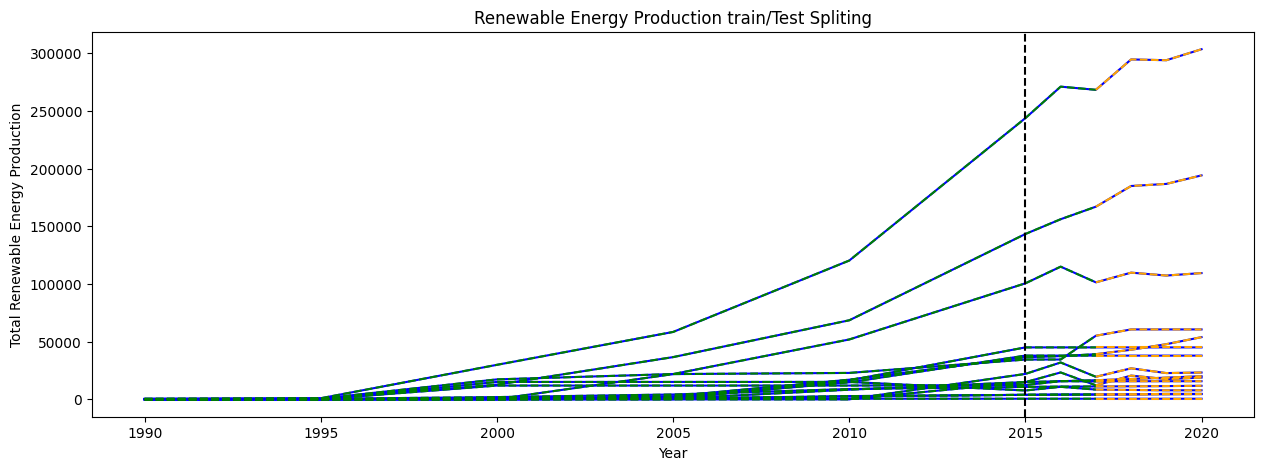

[0]	validation_0-rmse:106471.64281	validation_1-rmse:260046.64886
[1000]	validation_0-rmse:1979.65604	validation_1-rmse:4237.07821
[2000]	validation_0-rmse:1482.88080	validation_1-rmse:2562.43433
[2999]	validation_0-rmse:1223.05256	validation_1-rmse:1732.02058
MSE is : 2999886.9327037544
MAE is : 1182.0860500000126
RMSE is : 1732.0181675443691
MAPE is : 0.004275379801935269
R2 is : 0.9826343729606



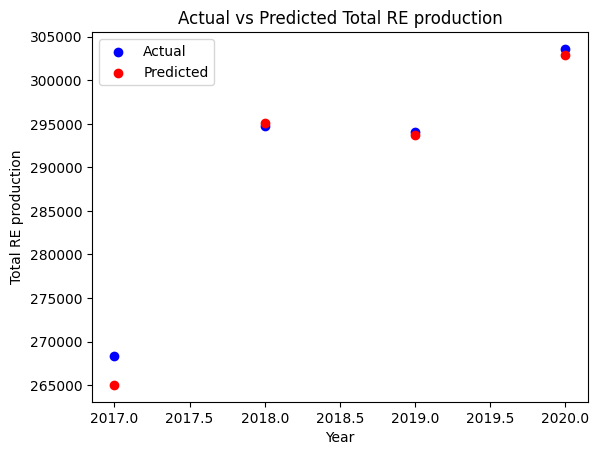

In [78]:
 
# Splitting the data for training and testing
from sklearn import metrics

## split  and plot

train = renewable_energy_extended.loc[  renewable_energy_extended.index <= 2017]
test = renewable_energy_extended.loc[renewable_energy_extended.index >=  2017]

# Creating a line plot
fig, ax = plt.subplots(figsize=(15, 5))

# Plot the entire dataset
ax.plot(renewable_energy_extended.index, renewable_energy_extended, label='Entire Dataset', linestyle='-', color='blue')

# Highlight the training set
ax.plot(train.index, train, label='Training Set', linestyle='--', color='green')

# Highlight the test set
ax.plot(test.index, test, label='Test Set', linestyle='--', color='orange')

# Adding a vertical dashed line at '01-01-2015'
ax.axvline(2015, color='black', ls='--')

# Adding legend and labels
#ax.legend()
ax.set_title('Renewable Energy Production train/Test Spliting')
ax.set_xlabel('Year')
ax.set_ylabel('Total Renewable Energy Production')

# Displaying the plot
plt.show()


################# the model 

X = renewable_energy_extended.drop(['Total RE in heat', 'Total RE in electricity', 'Total RE production'], axis=1)
y = renewable_energy_extended['Total RE production']


# Define features (X) and target variable (y) for training set
X_train = train.drop(['Total RE in heat' , 'Total RE in electricity' , 'Total RE production' ], axis=1)
y_train = train['Total RE production']

# Define features (X) and target variable (y) for test set
X_test = test.drop(['Total RE in heat', 'Total RE in electricity' , 'Total RE production' ], axis=1)
y_test = test['Total RE production']


# Create and train the XGBoost model

'''reg_xgb = xgb.XGBRegressor(
    base_score=0.5,
    booster='gbtree', # significant better  performance than  
    n_estimators=100000,
    early_stopping_rounds=10000,
    objective='reg:linear',
    max_depth=300,
    learning_rate=0.01
)''' 


reg_xgb = xgb.XGBRegressor(
    booster='gblinear',
    objective='reg:linear',
    n_estimators=3000, # increase lead to better results
    learning_rate=0.01,
    reg_lambda=1,  # L2 regularization term
    reg_alpha=1,  # L1 regularization term
    base_score=0.1,
)

reg_xgb.fit(X_train, y_train,
            eval_set=[(X_train, y_train), (X_test, y_test)],

            verbose=1000)


# Make predictions on the test set
y_pred = reg_xgb.predict(X_test)

# Evaluate the performance


print(f'MSE is : {metrics.mean_squared_error(y_test, y_pred)}')
print(f'MAE is : {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}')
print(f'MAPE is : {metrics.mean_absolute_percentage_error(y_test, y_pred)}')
print(f'R2 is : {metrics.r2_score(y_test, y_pred)}',end='\n\n')
 

 
# Plot the predicted vs actual values
plt.scatter(test.index, y_test, label='Actual', color='blue')
plt.scatter(test.index, y_pred, label='Predicted', color='red')
plt.xlabel("Year")
plt.ylabel("Total RE production")
plt.title("Actual vs Predicted Total RE production")
plt.legend()
plt.show()


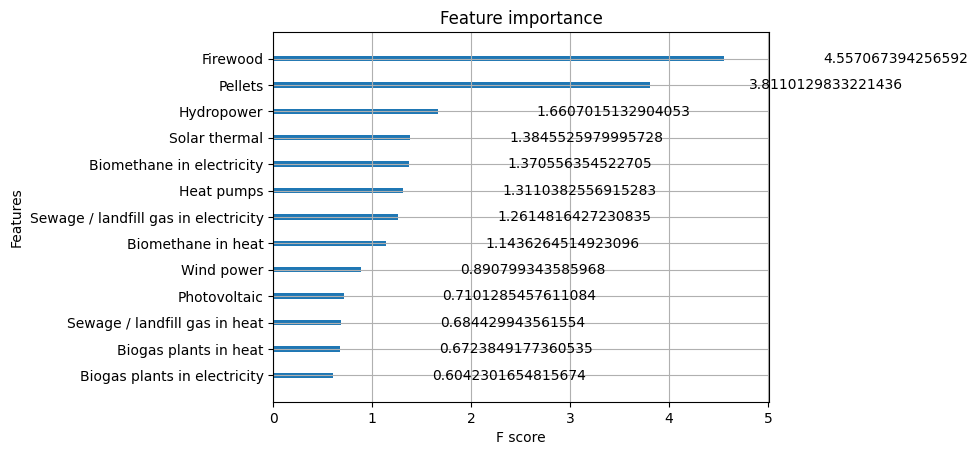

[0.03539668 0.0444023  0.08277842 0.03011813 0.06287912 0.06831601
 0.06901366 0.0653493  0.18996167 0.2271491  0.03351533 0.03411572
 0.05700458]


In [85]:
 
# Plot feature importance
xgb.plot_importance(reg_xgb)
plt.show()

 

# Make predictions on the test set
y_pred = reg_xgb.predict(X_test)

# Evaluate the performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

 
 

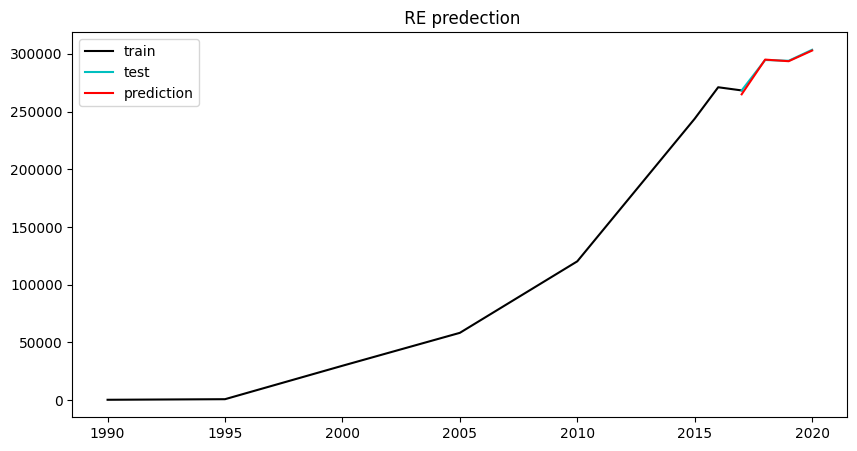

In [80]:
 
 
# Plot the predicted vs actual values
test['Total_RE_Prediction'] = reg_xgb.predict(X_test)

train['Total RE production'].plot(style='k', figsize=(10,5), label = 'train')
test['Total RE production'].plot(style='c', figsize=(10,5), label = 'test')
test['Total_RE_Prediction'].plot(style='r', figsize=(10,5), label = 'prediction')
plt.title(' RE predection' )
plt.legend()

In [81]:
pred_y_df = pd.DataFrame({'ActualValue': y_test, 'Predicted value': y_pred, 'Difference': y_test - y_pred})
pred_y_df[0:20]

,ActualValue,Predicted value,Difference
2017,268385.08840,265020.59375,3364.49465
2018,294746.70526,295089.06250,-342.35724
2019,294062.74456,293694.81250,367.93206
2020,303598.15400,302944.59375,653.56025


In [82]:
#
import statsmodels.api as sm
model = sm.OLS(y, X ).fit()
print(model.summary2())

                              Results: Ordinary least squares
Model:                      OLS                        Adj. R-squared:            1.000     
Dependent Variable:         Total RE production        AIC:                       -1212.1605
Date:                       2024-01-04 23:05           BIC:                       -1196.3866
No. Observations:           31                         Log-Likelihood:            617.08    
Df Model:                   10                         F-statistic:               7.176e+28 
Df Residuals:               20                         Prob (F-statistic):        2.83e-283 
R-squared:                  1.000                      Scale:                     4.6546e-19
--------------------------------------------------------------------------------------------
                                     Coef.  Std.Err.         t          P>|t|  [0.025 0.975]
--------------------------------------------------------------------------------------------
Photovol

## Conclusion: 
    
Continue monitoring and implementing policies that encourage cleaner energy sources and sustainable practices.
Explore opportunities for further improvements in sectors showing slower declines.
Consider promoting and adopting green technologies to accelerate the reduction in CO2 emissions.
    

### Refrences: 

* https://www.alt-bau-neu.de/kreis-borken/abnwaermepumpen-29087.asp  

* https://www.swd-ag.de/magazin/wasserkraft/ 

* https://www.stadt-muenster.de/klima/foerderprogramm/photovoltaik

* https://farwick-muehlenbau.de/biogasanlagen-unser-beitrag-zu-erneuerbaren-energien/

* https://www.plenter.ms/shk/heizung/heizsysteme/kamine-oefen/brennstoffe/pellets

* https://www.heizungsbau.net/magazin/scheitholzheizung-20204393 
 
* https://climatefalsesolutions.org/landfill-gas-to-energy/  

* https://www.swd-ag.de/magazin/wasserkraft/   

* https://orsted.de/gruene-energie/energie-lexikon/co2-emissionen

* https://www.energy.gov/eere/renewable-energy

* https://www.itl.nist.gov/div898/handbook/pmc/section4/pmc442.htm

* https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/

* https://www.kaggle.com/code/sunaysawant/power-consumption-time-series-arima

* https://www.kdnuggets.com/2023/08/leveraging-xgboost-timeseries-forecasting.html#:~:text=Often%20the%20use%20cases%20are,can%20predict%20future%20numerical%20values.

* https://www.kaggle.com/code/stuarthallows/using-xgboost-with-scikit-learn

* https://wandb.ai/madhana/Time_Series/reports/Python-Time-Series-Forecasting-A-Practical-Approach--VmlldzoyODk4NjUz#:~:text=There%20are%20several%20techniques%20to,data%20is%20likely%20non%2Dstationary.

* 